In [1]:
import pandas as pd
import numpy as np
import konlpy
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from konlpy.tag import Okt

In [3]:
from sklearn.feature_extraction.text import CountVectorizer   # tf-idf 방식을 사용하려면 대신 TfidfVectorizer를 import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
reviews_df = pd.read_csv('REVIEW.csv', encoding='utf-8', parse_dates=['Upload Date'])
reviews_df.head()

,Review,Review Code,Score,Store Code,Test,Upload Date,User Id
0,가지마 이거봤으면 가지마,DB000001,1.0,STORE_DB00001,DB,2021-07-27,16d9tp6
1,고기 올려놓고 손님한테 구우라고 하고 화장실감 공기밥 달라고 세번 얘기해야 가져다줌...,DB000002,1.0,STORE_DB00001,DB,2021-07-25,unrrni
2,구워주는 고기집에 고기를 올려놓고 화장실 가고.. 손님한테 구우라는 건 뭔가요? 그...,DB000003,1.0,STORE_DB00001,DB,2021-07-25,qr530u
3,"이동네서는 대형음식점 갈데가 별로 없으니, 배짱식으로 장사하는 곳. 음식 중상, ...",DB000004,2.0,STORE_DB00001,DB,2021-07-17,vel3rk
4,손님말 안듣는 직원들이 근무하는곳이네..,DB000005,1.0,STORE_DB00001,DB,2021-07-17,167lsjl


In [5]:
review = reviews_df[['Review','Score']]

In [6]:
review.shape

(316352, 2)

In [7]:
print(review.isna().sum())

Review    61296
Score     32851
dtype: int64


In [8]:
review = review.dropna(axis=0)

In [9]:
review.shape

(223220, 2)

In [10]:
review.head()

,Review,Score
0,가지마 이거봤으면 가지마,1.0
1,고기 올려놓고 손님한테 구우라고 하고 화장실감 공기밥 달라고 세번 얘기해야 가져다줌...,1.0
2,구워주는 고기집에 고기를 올려놓고 화장실 가고.. 손님한테 구우라는 건 뭔가요? 그...,1.0
3,"이동네서는 대형음식점 갈데가 별로 없으니, 배짱식으로 장사하는 곳. 음식 중상, ...",2.0
4,손님말 안듣는 직원들이 근무하는곳이네..,1.0


In [11]:
# 텍스트를 tokenize해서 adjective, verb, noun만 추출하는 함수

def tokenize_korean_text(text): 
    text_filtered = re.sub('[^,.?!\w\s]','', text)

    okt = Okt() 
    Okt_morphs = okt.pos(text_filtered) 

    words = []
    for word, pos in Okt_morphs:
        if pos == 'Adjective' or pos == 'Verb' or pos == 'Noun':
            words.append(word)

    words_str = ' '.join(words)
    return words_str

In [12]:
X1 = []
X2 = []
X3 = []
X4 = []
X5 = []

for star, comment in zip(review['Score'], review['Review']):
    
    if star == 1.0:
        tokenized_comment = tokenize_korean_text(comment)  # 위에서 만들었던 함수로 comment 쪼개기
        X1.append(tokenized_comment)
        
    elif star == 2.0:
        tokenized_comment = tokenize_korean_text(comment)  # 위에서 만들었던 함수로 comment 쪼개기
        X2.append(tokenized_comment)
    
    elif star == 3.0:
        tokenized_comment = tokenize_korean_text(comment)  # 위에서 만들었던 함수로 comment 쪼개기
        X3.append(tokenized_comment)
        
    elif star == 4.0:
        tokenized_comment = tokenize_korean_text(comment)  # 위에서 만들었던 함수로 comment 쪼개기
        X4.append(tokenized_comment)
        
    elif star == 5.0:
        tokenized_comment = tokenize_korean_text(comment)  # 위에서 만들었던 함수로 comment 쪼개기
        X5.append(tokenized_comment)
        
    else :
        pass

print(f'원래 text 수: {len(review)}')

원래 text 수: 223220


In [43]:
print(X1[:5])

['가지마 거 봤으면 가지마', '고기 올려놓고 손님 구우 하고 화장 실감 공기밥 달라 세번 얘기 해야 가져다줌 익은 양파 먹으라고 올려줌 테이블 후식 주시던데 저희 테이블 까먹으 신건 후식 챙겨 줌', '구워주는 집 고기 올려놓고 화장실 가고 손님 구우 건 뭔가 후식 일부러 안준 건가 우리 테이블 줬던데 물 달라 세번 그릇 달라 번 한번 나온건 반찬 없네요 고기랑 찌개 달랬는데 먹고 나오고 달라 번 해야 겨우 나옴 찌개 먹고 밥 나옴 직원 교육 좀 시키세요 기분 좋게 고기 먹으러 왔', '손님 말 듣는 직원 근무 하는 곳', '우한 폐렴']


In [44]:
print(X2[:5])

['동네 서는 대형 음식점 갈데가 별로 없으니 배짱 장사 하는 곳 음식 중상 위생 보통 분위기 중상 가격 중상 최상 우수 중상 보통 별로 최악', '가격 비싼만큼 나오는 곳 왕 갈비탕 명품 갈비탕 반찬 다름 피클 절임 가지 가격 높은 갈비탕 유도 좀 했으면', '층 식사 했는데 사람 많고 카운터 직원 불친절', '도봉구 꽤 유명한 대형 고깃집 대표 식사 메뉴인 갈비탕 고집 정성 담은 명품 갈비탕 입 소문 자자하지만 국물 맛 그냥 그렇고 미국 산 갈비 잡내가 난다', '딸린 정원 산책 하기 괜찮아요 분위기 괜찮은 편이 음식 맛 좋은지는 모르겠어요 메뉴판 설명 곳 먹을수있는 특별한 음식 것 설명 해놓아서 멍게 파스타 시켜 봤는데 정말 맛 없고 비린내가 심해서 그 날 입맛 뚝 떨어졌네요 가격 대비 창렬노맛 가격 멍게 파스타 멍게 파스타']


In [45]:
print(X3[:5])

['맛있지만 가격 때문 별', '음 갈비탕 어머니 좋아하셔서 종종 가는데 음식 맛 주차 서비스 좀 껄쩍 지근 하네요 큰 매형 차 타고 가면 가까운 위치 주차 하는 것 같고 차 둘째 매형 차가 가면 저 멀리 후방 주차장 주차 하라 번 아니고 그럴리 없을 거 생각 차 따라서 주차 서비스 달라지는 느낌 들어서', '깔끔하고 괜찮아요', '갈비탕', '갈비탕 냉면']


In [13]:
print(X4[:5])

['푸 짐 갈비탕', '어른 한정식 먹기 아주 괜찮음 플레이 팅 좋고 음식 맛 좋음 주차 조금 불편해서 별 개', '그냥 갈비탕 제일 맛', '맛있지만 가격 비쌈', '갈비탕 굿 갈비탕 큰만큼 갈비탕 손님 홀 대하 우 범 하지마라']


In [14]:
print(X5[:5])

['강북 누소 모르는 분 없을 정도 유명하죠 음식 맛있고 가족 행사 있으면 연회 장도 예약 할 수 있고 딱이네요', '창동 누소 입 소문 난 만큼 괜찮더라 고욤', '누소 갈비탕 아이 좋아해서 시켜 먹기 하고 자주 애용 하는 곳 입니다 가족 외식 하기 좋은 곳', '만 생 갈비 먹 는데요 일단 고기 이네요 역시 강북 최고 다음 회사 회식 강추 입니다', '저번 주 토요일 가족 고기 먹으러 갔는데 맛있고 친절하더라구요 배 터지는데도 후식 냉면 먹고 왔네요 여기 상견례 예약 하고 왔어요']


In [20]:
# X_texts = []
# y = []

# for star, comment in zip(review['Score'], review['Review']):
    
#     tokenized_comment = tokenize_korean_text(comment)  # 위에서 만들었던 함수로 comment 쪼개기
#     X_texts.append(tokenized_comment)
    
#     y.append(1 if star > 3 else -1)
#     # 평점이 8 이상이면(8,9,10) 값을 1로 지정 (positive)
#     # 평점이 3 이하이면(1,2,3) 값을 -1로 지정 (negative)

# print(f'원래 text 수: {len(reviews)}')
# # print(f'평점 3 이하 혹은 8 이상인 text 수: {len(X_texts)}')
# print(X_texts[:5])

원래 text 수: 9086
['비싸', '맛 좋으나 기다림 문제', '들깨 수제비 욕심 부리면 배 터집니다 백숙 메일 전이 충분 남은 음식 포장 가능', '굿 애프터 이크 푸드', '좋아 함 자주 감 닭 누룽지 훨 맛있음 누룽지 먹기 위해 닭백숙 시켜야 하는 슬픈 현실 센터 살코기 조금 넣고 누룽지 죽 메뉴 좀 파세요 인분 먹을 의향 있음']


In [16]:
print('별점 1점 :',len(X1),'\\n별점 2점 ',len(X2), '\n별점 3점 :', len(X3), '\n별점 4점 :', len(X4), '\n별점 5점 :', len(X5))

별점 1점 : 41430 
별점 2점 : 15548 
별점 3점 : 28359 
별점 4점 : 45679 
별점 X점 : 92204


In [17]:
print('별점 1점 : {0}개 \n별점 2점 : {1}개 \n별점 3점 : {2}개 \n별점 4점 : {3}개 \n별점 5점 : {4}개'
      .format(len(X1),len(X2),len(X3),len(X4),len(X5)))

별점 1점 : 41430개 
별점 2점 : 15548개 
별점 3점 : 28359개 
별점 4점 : 45679개 
별점 5점 : 92204개


In [19]:
okt = Okt()

In [29]:
vocab1 = {}
sentences1 = []

for text in X1:
    sentence = okt.nouns(text)
    
    for word in sentence:
        if word not in vocab1:
            vocab1[word] = 0
        vocab1[word] += 1
    
    sentences1.append(sentence)

print(sentences1[:5])

[['거'], ['고기', '손님', '구', '화장', '실감', '공기밥', '달라', '세번', '얘기', '양파', '테이블', '후식', '저희', '테이블', '신건', '후식', '줌'], ['집', '고기', '화장실', '손님', '구', '건', '뭔가', '후식', '일부러', '안준', '건가', '우리', '테이블', '물', '달라', '세번', '그릇', '달라', '번', '한번', '반찬', '고기랑', '찌개', '달라', '번', '겨우', '찌개', '밥', '직원', '교육', '좀', '기분', '고기'], ['손님', '말', '직원', '근무', '곳'], ['우한', '폐렴']]


In [39]:
vocab2 = {}
sentences2 = []

for text in X2:
    sentence = okt.nouns(text)
    
    for word in sentence:
        if word not in vocab2:
            vocab2[word] = 0
        vocab2[word] += 1
    
    sentences2.append(sentence)

print(sentences2[:5])

[['동네', '대형', '음식점', '별로', '배짱', '장사', '곳', '음식', '중상', '위생', '보통', '분위기', '중상', '가격', '중상', '최상', '우수', '중상', '보통', '별로', '최악'], ['가격', '곳', '왕', '갈비탕', '명품', '갈비탕', '반찬', '피클', '절임', '가지', '가격', '갈비탕', '유도', '좀'], ['층', '식사', '사람', '카운터', '직원', '불친절'], ['도봉구', '꽤', '대형', '고깃집', '대표', '식사', '메뉴인', '갈비탕', '고집', '정성', '명품', '갈비탕', '입', '소문', '국물', '맛', '그냥', '미국', '산', '갈비'], ['정원', '산책', '분위기', '편이', '음식', '맛', '메뉴판', '설명', '곳', '음식', '것', '설명', '멍게', '파스타', '정말', '맛', '그', '날', '입맛', '뚝', '가격', '대비', '창렬노맛', '가격', '멍게', '파스타', '멍게', '파스타']]


In [43]:
vocab3 = {}
sentences3 = []

for text in X3:
    sentence = okt.nouns(text)
    
    for word in sentence:
        if word not in vocab3:
            vocab3[word] = 0
        vocab3[word] += 1
    
    sentences3.append(sentence)

print(sentences3[:5])

[['가격', '때문', '별'], ['음', '갈비탕', '어머니', '종종', '음식', '맛', '주차', '서비스', '좀', '껄쩍', '지근', '매형', '차', '타고', '가면', '위치', '주차', '것', '차', '둘째', '매형', '가면', '저', '멀리', '후방', '주차장', '주차', '하라', '번', '거', '생각', '차', '따라서', '주차', '서비스', '느낌'], [], ['갈비탕'], ['갈비탕', '냉면']]


In [46]:
vocab4 = {}
sentences4 = []

for text in X4:
    sentence = okt.nouns(text)
    
    for word in sentence:
        if word not in vocab4:
            vocab4[word] = 0
        vocab4[word] += 1
    
    sentences4.append(sentence)

print(sentences4[:5])

[['짐', '갈비탕'], ['어른', '한정식', '먹기', '아주', '플레이', '팅', '음식', '맛', '주차', '조금', '별', '개'], ['그냥', '갈비탕', '제일', '맛'], ['가격'], ['갈비탕', '굿', '갈비탕', '갈비탕', '손님', '홀', '대하', '범']]


In [20]:
vocab5 = {}
sentences5 = []

for text in X5:
    sentence = okt.nouns(text)
    
    for word in sentence:
        if word not in vocab5:
            vocab5[word] = 0
        vocab5[word] += 1
    
    sentences5.append(sentence)

print(sentences5[:5])

[['강북', '누소', '분', '정도', '음식', '가족', '행사', '연회', '장도', '예약', '수'], ['창동', '누소', '입', '소문', '난', '만큼', '고욤'], ['누소', '갈비탕', '아이', '먹기', '자주', '애용', '곳', '가족', '외식', '곳'], ['만', '생', '갈비', '일단', '고기', '역시', '강북', '최고', '다음', '회사', '회식', '강추'], ['저번', '주', '토요일', '가족', '고기', '배', '후식', '냉면', '여기', '상견례', '예약']]


In [29]:
# for text in X_texts:
#     sentence = okt.nouns(text)
    
#     for word in sentence:
#         if word not in vocab:
#             vocab[word] = 0
#         vocab[word] += 1
    
#     sentences.append(sentence)

# print(sentences[:5])

[[], ['맛', '기다림', '문제'], ['들깨', '수제비', '욕심', '부리면', '배', '백숙', '메일', '전이', '충분', '음식', '포장', '가능'], ['굿', '애프터', '이크', '푸드'], ['함', '자주', '감', '닭', '누룽지', '훨', '누룽지', '먹기', '위해', '닭백숙', '현실', '센터', '살코기', '조금', '누룽지', '죽', '메뉴', '좀', '인분', '의향']]


In [30]:
# vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
# print(vocab_sorted[:5])

[('맛', 2501), ('가격', 888), ('곳', 737), ('진짜', 736), ('집', 657)]


In [ ]:
import csv

In [33]:
vocab_sorted1 = sorted(vocab1.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted1[:30])

[('맛', 13633), ('직원', 5874), ('음식', 4785), ('손님', 4646), ('별로', 4390), ('주문', 4196), ('사람', 4159), ('가격', 4020), ('그냥', 4007), ('서비스', 3948), ('진짜', 3912), ('곳', 3837), ('안', 3624), ('말', 3450), ('최악', 3357), ('집', 3342), ('때', 3260), ('것', 3061), ('고기', 3035), ('정말', 2983), ('왜', 2918), ('여기', 2878), ('돈', 2799), ('기분', 2774), ('사장', 2668), ('좀', 2599), ('불친절', 2484), ('더', 2427), ('하나', 2288), ('정도', 2276)]


In [38]:
with open('List_star1.csv','w') as file:
    write = csv.writer(file)
    write.writerows(sentences1)

with open('List_star1_1.csv','w') as file:
    write = csv.writer(file)
    write.writerows(vocab_sorted1)

In [41]:
vocab_sorted2 = sorted(vocab2.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted2[:30])

[('맛', 7217), ('가격', 2454), ('그냥', 1962), ('별로', 1846), ('좀', 1527), ('음식', 1397), ('직원', 1319), ('것', 1307), ('곳', 1139), ('고기', 1126), ('때', 1103), ('정도', 1072), ('사람', 1021), ('집', 1005), ('더', 926), ('안', 920), ('서비스', 905), ('느낌', 874), ('방문', 842), ('분위기', 803), ('양', 788), ('주문', 786), ('생각', 784), ('왜', 773), ('손님', 769), ('커피', 709), ('밥', 678), ('점', 674), ('정말', 660), ('메뉴', 658)]


In [42]:
with open('List_star2.csv','w') as file:
    write = csv.writer(file)
    write.writerows(sentences2)

with open('List_star2_1.csv','w') as file:
    write = csv.writer(file)
    write.writerows(vocab_sorted2)

In [44]:
vocab_sorted3 = sorted(vocab3.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted3[:30])

[('맛', 11108), ('가격', 3579), ('좀', 2883), ('그냥', 2320), ('곳', 2018), ('것', 1896), ('정도', 1890), ('집', 1850), ('분위기', 1753), ('때', 1609), ('음식', 1585), ('사람', 1538), ('느낌', 1513), ('별로', 1512), ('더', 1466), ('고기', 1449), ('생각', 1389), ('커피', 1288), ('무난', 1287), ('양', 1260), ('직원', 1241), ('비', 1161), ('점', 1137), ('메뉴', 1102), ('가성', 1086), ('보통', 1079), ('함', 1006), ('조금', 1004), ('듯', 979), ('방문', 973)]


In [45]:
with open('List_star3.csv','w') as file:
    write = csv.writer(file)
    write.writerows(sentences3)

with open('List_star3_1.csv','w') as file:
    write = csv.writer(file)
    write.writerows(vocab_sorted3)

In [47]:
vocab_sorted4 = sorted(vocab4.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted4[:30])

[('맛', 13342), ('가격', 4915), ('좀', 3978), ('곳', 3763), ('분위기', 3309), ('집', 2914), ('것', 2422), ('더', 2375), ('고기', 2279), ('때', 2267), ('음식', 2211), ('커피', 2072), ('사람', 1987), ('양', 1848), ('정말', 1838), ('조금', 1826), ('비', 1809), ('메뉴', 1802), ('수', 1798), ('맛집', 1736), ('국물', 1732), ('가성', 1693), ('느낌', 1690), ('직원', 1667), ('진짜', 1648), ('생각', 1642), ('정도', 1586), ('점', 1574), ('팅', 1515), ('추천', 1497)]


In [48]:
with open('List_star4.csv','w') as file:
    write = csv.writer(file)
    write.writerows(sentences4)

with open('List_star4_1.csv','w') as file:
    write = csv.writer(file)
    write.writerows(vocab_sorted4)

In [36]:
vocab_sorted5 = sorted(vocab5.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted5[:30])

[('맛', 22170), ('최고', 9246), ('진짜', 9141), ('곳', 8115), ('정말', 6991), ('집', 6893), ('맛집', 6539), ('분위기', 6436), ('가격', 6231), ('사장', 6077), ('여기', 5950), ('직원', 5380), ('음식', 5050), ('고기', 4942), ('또', 4717), ('때', 4696), ('방문', 4016), ('것', 3882), ('서비스', 3729), ('더', 3679), ('커피', 3656), ('추천', 3652), ('존맛', 3337), ('메뉴', 3071), ('수', 3026), ('사람', 3019), ('꼭', 2990), ('비', 2932), ('가성', 2860), ('자주', 2853)]


In [37]:
with open('List_star5.csv','w') as file:
    write = csv.writer(file)
    write.writerows(sentences5)
    
with open('List_star5_1.csv','w') as file:
    write = csv.writer(file)
    write.writerows(vocab_sorted5)

In [23]:
import numpy as np

from PIL import Image
from wordcloud import WordCloud

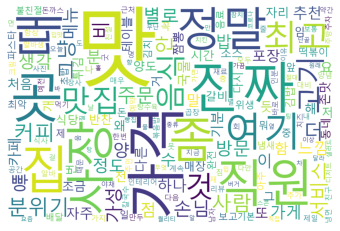

In [33]:
font_path = 'malgun.ttf'

wc = WordCloud(width = 1500, height = 1000, background_color="white", font_path=font_path)
wc = wc.generate_from_frequencies(dict(vocab_sorted))
wc.to_file('wordcloud.png')
# wc.generate_from_frequencies(dict(vocab_sorted))

plt.imshow(wc)
plt.axis("off")
plt.show()

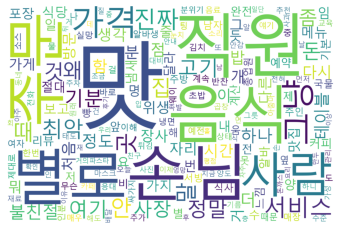

In [62]:
font_path = 'malgun.ttf'

wc = WordCloud(width = 1500, height = 1000, background_color="white", font_path=font_path)
wc = wc.generate_from_frequencies(dict(vocab_sorted1))
wc.to_file('wordcloud1.png')
# wc.generate_from_frequencies(dict(vocab_sorted))

plt.imshow(wc)
plt.axis("off")
plt.show()

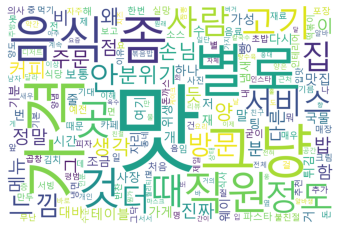

In [63]:
font_path = 'malgun.ttf'

wc = WordCloud(width = 1500, height = 1000, background_color="white", font_path=font_path)
wc = wc.generate_from_frequencies(dict(vocab_sorted2))
wc.to_file('wordcloud2.png')
# wc.generate_from_frequencies(dict(vocab_sorted))

plt.imshow(wc)
plt.axis("off")
plt.show()

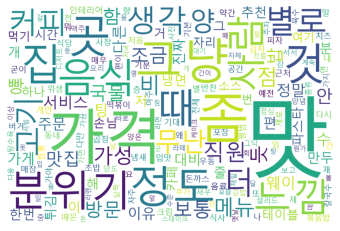

In [66]:
font_path = 'malgun.ttf'

wc = WordCloud(width = 1500, height = 1000, background_color="white", font_path=font_path)
wc = wc.generate_from_frequencies(dict(vocab_sorted3))
wc.to_file('wordcloud3.png')
# wc.generate_from_frequencies(dict(vocab_sorted))

plt.imshow(wc)
plt.axis("off")
plt.show()

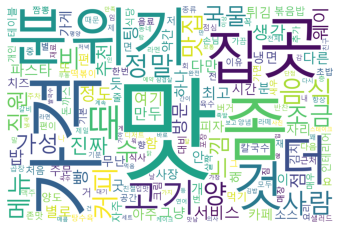

In [69]:
font_path = 'malgun.ttf'

wc = WordCloud(width = 1500, height = 1000, background_color="white", font_path=font_path)
wc = wc.generate_from_frequencies(dict(vocab_sorted4))
wc.to_file('wordcloud4.png')
# wc.generate_from_frequencies(dict(vocab_sorted))

plt.imshow(wc)
plt.axis("off")
plt.show()

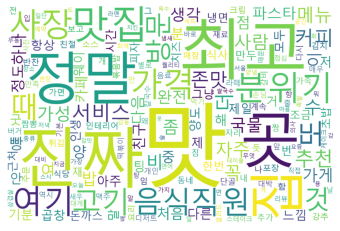

In [24]:
font_path = 'malgun.ttf'

wc = WordCloud(width = 1500, height = 1000, background_color="white", font_path=font_path)
wc = wc.generate_from_frequencies(dict(vocab_sorted5))
wc.to_file('wordcloud5.png')
# wc.generate_from_frequencies(dict(vocab_sorted))

plt.imshow(wc)
plt.axis("off")
plt.show()